In [1]:
import seaborn as sns
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
import warnings
from sklearn.exceptions import ConvergenceWarning

warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter("ignore", category=ConvergenceWarning)

In [2]:
##################
# Display Settings
##################

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [3]:
insurance=pd.read_csv("C:/Users/ahmet/Desktop/vscode/data science/GAI Hub Proje/insurance.csv")
df=insurance.copy()
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.924
1,18,male,33.770,1,no,southeast,1725.552
2,28,male,33.000,3,no,southeast,4449.462
3,33,male,22.705,0,no,northwest,21984.471
4,32,male,28.880,0,no,northwest,3866.855


##############################################
# Exploratory Data Analysis:
##############################################

In [4]:
##########
# check_df
##########

def check_df(dataframe, head=5):
    print("##################### Shape #####################")
    print(dataframe.shape)
    print("##################### Types #####################")
    print(dataframe.dtypes)
    print("##################### Head #####################")
    print(dataframe.head(head))
    print("##################### Tail #####################")
    print(dataframe.tail(head))
    print("##################### NA #####################")
    print(dataframe.isnull().sum())


check_df(df)

##################### Shape #####################
(1338, 7)
##################### Types #####################
age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object
##################### Head #####################
   age     sex    bmi  children smoker     region   charges
0   19  female 27.900         0    yes  southwest 16884.924
1   18    male 33.770         1     no  southeast  1725.552
2   28    male 33.000         3     no  southeast  4449.462
3   33    male 22.705         0     no  northwest 21984.471
4   32    male 28.880         0     no  northwest  3866.855
##################### Tail #####################
      age     sex    bmi  children smoker     region   charges
1333   50    male 30.970         3     no  northwest 10600.548
1334   18  female 31.920         0     no  northeast  2205.981
1335   18  female 36.850         0     no  southeast  1629.833
1336   21  female 25.800  

In [5]:
################
# grab_col_names
################

def grab_col_names(dataframe, cat_th=10, car_th=20):
    """
    
    Parameters
    ------
        dataframe: dataframe
                Değişken isimleri alınmak istenilen dataframe
        cat_th: int, optional
                numerik fakat kategorik olan değişkenler için sınıf eşik değeri
        car_th: int, optinal
                kategorik fakat kardinal değişkenler için sınıf eşik değeri

    Returns
    ------
        cat_cols: list
                Kategorik değişken listesi
        num_cols: list
                Numerik değişken listesi
        cat_but_car: list
                Kategorik görünümlü kardinal değişken listesi

    Examples
    ------
        import seaborn as sns
        df = sns.load_dataset("iris")
        print(grab_col_names(df))


    Notes
    ------
        cat_cols + num_cols + cat_but_car = toplam değişken sayısı
        num_but_cat cat_cols'un içerisinde.
        Return olan 3 liste toplamı toplam değişken sayısına eşittir: cat_cols + num_cols + cat_but_car = değişken sayısı

    """

    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')
    return cat_cols, num_cols, cat_but_car

cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 1338
Variables: 7
cat_cols: 4
num_cols: 3
cat_but_car: 0
num_but_cat: 1


############################
# Feature Analysis
############################

In [6]:


def plot_numerical_col(dataframe, numerical_col):
    dataframe[numerical_col].hist(bins=20)
    plt.xlabel(numerical_col)
    plt.show(block=True)


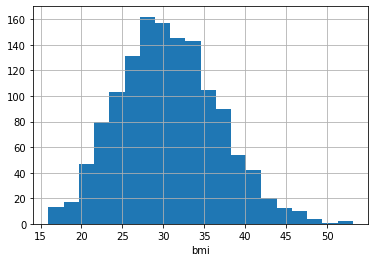

In [7]:
#Examination of the distribution of Bmi (Body Mass Index)

plot_numerical_col(df, "bmi")

In [8]:
#examine_relationship:

def examine_relationship(dataframe, col1, col2, draw = False):
    print(dataframe.groupby(col1).agg({col2: "mean"}), end="\n\n\n")
    ################################################################
    if (draw==True):
        sns.boxplot(x = col1, y = col2, palette = ["m", "g"],
                data = df)
        sns.despine(offset = 10, trim = True)

         charges
smoker          
no      8434.268
yes    32050.232




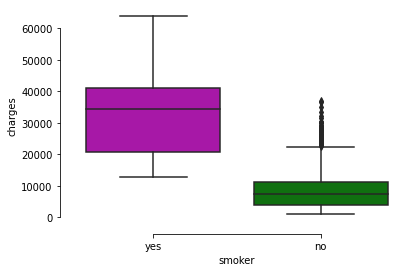

In [9]:
#Examination of the relationship between “smoker” and “charges”

examine_relationship(df, "smoker", "charges", True)

In [10]:
#Examination of the relationship between “smoker”  and “region”

#examine_relationship(df, "region", "smoker")

          bmi
sex          
female 30.378
male   30.943




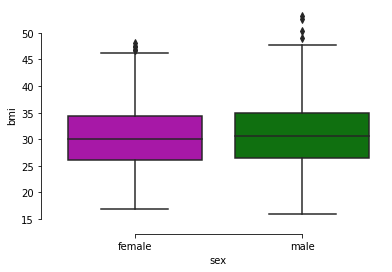

In [11]:
#Examination of the relationship between “bmi” and “sex”

examine_relationship(df, "sex", "bmi", True)

In [12]:
#Find the "region" with the most "children"



TypeError: pie() got an unexpected keyword argument 'y'

<AxesSubplot:xlabel='age', ylabel='bmi'>

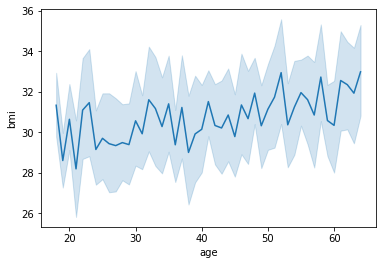

In [ ]:
#Examine the relationship between “age” and “bmi”

sns.lineplot(x = "age", y = "bmi", data=df)

<AxesSubplot:xlabel='children', ylabel='bmi'>

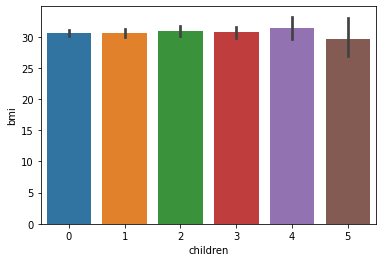

In [ ]:
#Examine the relationship between “bmi” and “children”

sns.barplot(x = "children", y = "bmi", data=df)

In [ ]:
#Is there an outlier in the "bmi" variable?
#Answer is yes and outliers are shown below.

def outlier_thresholds(dataframe, col_name, q1=0.25, q3=0.75):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit
    
def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

def grab_outliers(dataframe, col_name, index=False):
    low, up = outlier_thresholds(dataframe, col_name)

    if dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))].shape[0] > 10:
        print(dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))].head())
    else:
        print(dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))])

    if index:
        outlier_index = dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))].index
        return outlier_index

check_outlier(df, "bmi")
grab_outliers(df, "bmi", True)

      age     sex    bmi  children smoker     region   charges
116    58    male 49.060         0     no  southeast 11381.325
286    46  female 48.070         2     no  northeast  9432.925
401    47    male 47.520         1     no  southeast  8083.920
543    54  female 47.410         0    yes  southeast 63770.428
847    23    male 50.380         1     no  southeast  2438.055
860    37  female 47.600         2    yes  southwest 46113.511
1047   22    male 52.580         1    yes  southeast 44501.398
1088   52    male 47.740         1     no  southeast  9748.911
1317   18    male 53.130         0     no  southeast  1163.463


Int64Index([116, 286, 401, 543, 847, 860, 1047, 1088, 1317], dtype='int64')

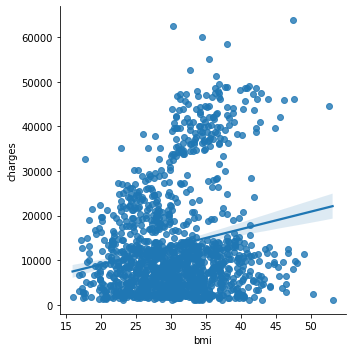

In [ ]:
#Examine the relationship between “bmi” and “charges”

sns.lmplot(x = "bmi", y = "charges", data=df)


<AxesSubplot:xlabel='smoker', ylabel='bmi'>

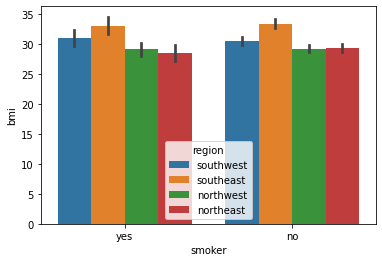

In [ ]:
#Examine the relationship between “region”, “smoker” and “bmi” using bar plot.

sns.barplot(x = "smoker", y = "bmi", hue = "region", data = df, orient = "v")

###################################
# Data Preprocessing:
###################################

In [ ]:
#Is there any column that includes outlier?

for col in num_cols:
    print(col, check_outlier(df, col))

age False
bmi True
charges True


In [ ]:
#Let's suppress outliers

################################
#(re-assignment with thresholds)
################################

def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

for i in num_cols:
    replace_with_thresholds(df, i)

for col in num_cols:
    print(col, check_outlier(df, col))

age False
bmi False
charges False


In [ ]:
#Is there any missing value?

df.isnull().values.any()

False

One-Hot Encoding:

In [ ]:
def one_hot_encoder(dataframe, categorical_cols, drop_first=True):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first)
    return dataframe

df = one_hot_encoder(df, cat_cols)
df_ohe = df
df.head()

,age,bmi,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest,children_1,children_2,children_3,children_4,children_5
0,19,27.900,16884.924,0,1,0,0,1,0,0,0,0,0
1,18,33.770,1725.552,1,0,0,1,0,1,0,0,0,0
2,28,33.000,4449.462,1,0,0,1,0,0,0,1,0,0
3,33,22.705,21984.471,1,0,1,0,0,0,0,0,0,0
4,32,28.880,3866.855,1,0,1,0,0,0,0,0,0,0


Min-Max Scaling:

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled=scaler.fit(df)
scaled_data=scaled.transform(df)
scaled_data

array([[0.02173913, 0.38110437, 0.47240762, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.56846473, 0.01809182, ..., 0.        , 0.        ,
        0.        ],
       [0.2173913 , 0.54388765, 0.09972549, ..., 1.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.66677306, 0.01522319, ..., 0.        , 0.        ,
        0.        ],
       [0.06521739, 0.31407597, 0.02655493, ..., 0.        , 0.        ,
        0.        ],
       [0.93478261, 0.41844877, 0.83972446, ..., 0.        , 0.        ,
        0.        ]])

In [ ]:
df_final = pd.DataFrame(scaled_data, columns = df_ohe.columns)
df_final.head()

,age,bmi,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest,children_1,children_2,children_3,children_4,children_5
0,0.022,0.381,0.472,0.000,1.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000
1,0.000,0.568,0.018,1.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,0.000
2,0.217,0.544,0.100,1.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000
3,0.326,0.215,0.625,1.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
4,0.304,0.412,0.082,1.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


##############################
# Model Selection:
##############################

In [ ]:
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from sklearn.linear_model import LinearRegression
import warnings
from sklearn.exceptions import ConvergenceWarning

In [ ]:
y = df_final['charges']
X = df_final.drop(["charges"], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 9)

In [ ]:
models = [('LR', LinearRegression()),
          ("Ridge", Ridge()),
          ("Lasso", Lasso()),
          ("ElasticNet", ElasticNet()),
          ('KNN', KNeighborsRegressor()),
          ('CART', DecisionTreeRegressor()),
          ('RF', RandomForestRegressor()),
          ('SVR', SVR()),
          ('GBM', GradientBoostingRegressor()),
          ("XGBoost", XGBRegressor(objective='reg:squarederror')),
          ("LightGBM", LGBMRegressor()),
          ("CatBoost", CatBoostRegressor(verbose=False))]

for name, regressor in models:
    rmse = np.mean(np.sqrt(-cross_val_score(regressor, X, y, cv=5, scoring="neg_mean_squared_error")))
    print(f"RMSE: {round(rmse, 4)} ({name}) ")

RMSE: 0.1534 (LR) 
RMSE: 0.1534 (Ridge) 
RMSE: 0.3042 (Lasso) 
RMSE: 0.3042 (ElasticNet) 
RMSE: 0.1659 (KNN) 
RMSE: 0.1894 (CART) 
RMSE: 0.1414 (RF) 
RMSE: 0.1433 (SVR) 
RMSE: 0.1312 (GBM) 
RMSE: 0.1577 (XGBoost) 
RMSE: 0.1366 (LightGBM) 
RMSE: 0.1369 (CatBoost) 


params = {
    "learning_rate": [0.001,0.01,0.1,0.5],
    "max_depth": [3,5,8,10],
    "n_estimators": [100,200,500,1000],
    "subsample": [1,0.5,0.8],
    "loss": ["ls","lad","hiber","quantile"],
}
gbm = GradientBoostingRegressor()
model_cv = GridSearchCV(gbm, params, cv=3, n_jobs=-1, verbose=2).fit(X_train, y_train)

In [ ]:
#model_cv.best_params_

In [ ]:
model_tuned = GradientBoostingRegressor(learning_rate=0.01,
                                        loss="lad",
                                        max_depth=5,
                                        n_estimators=1000,
                                        subsample=0.5).fit(X_train, y_train)
y_pred = model_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

0.12244773291148063

In [ ]:
print("Model Accuracy: %.2f" % model_tuned.score(X_test, y_test))

Model Accuracy: 0.83
